# **Machine Learning (Classificação) - Aprovação de Empréstimos**

### Dados da coluna:

 Este conjunto de dados fornece informações sobre as características dos requerentes de empréstimos e a sua avaliação de risco. Ele inclui informações sobre vários atributos dos solicitantes de empréstimo, incluindo detalhes demográficos, status financeiro, histórico de emprego e status de propriedade. O conjunto de dados inclui características numéricas e categóricas, tornando-o adequado para diversas abordagens analíticas.

 Principais características:

Id: Identificador exclusivo para cada solicitante de empréstimo.

Rendimento: O nível de rendimento do requerente.

Idade: Idade do candidato.

Experiência: Anos de experiência profissional.

Casado/Solteiro: Estado civil do requerente.

House_Ownership: Indica se o requerente possui ou aluga uma casa.

Car_Ownership: Indica se o requerente é proprietário de um carro.

Profissão: Ocupação ou profissão do candidato.

CIDADE: Cidade de residência do requerente.

ESTADO: Estado de residência do requerente.

CURRENT_JOB_YRS: Duração do emprego no emprego atual.

CURRENT_HOUSE_YRS: Duração da residência na casa atual.

Risk_Flag: Indicador binário de risco de empréstimo, onde 1 representa um candidato de risco sinalizado e 0 representa um candidato não arriscado.

## **Importando as Bibliotecas e Carregando o Dataset**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# ignorando avisos
warnings.filterwarnings('ignore')

# Estilo Dark nos gráficos do Matplotlib e Seaborn
plt.style.use('dark_background')

# Carregando os dados 
df = pd.read_json('/Users/diogomonteiro/loan_approval_dataset 3.json')

# Análisando os 5 primeiros dados
df.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


### **Análise Exploratória - Visão Geral**

 O objetivo desta análise é ter uma visão geral do conjunto de dados, compreendendo seu tamanho, variáveis e tipos de dados.

In [113]:
# Analisando o tamanho dos dados, xxxxx linhas, xx colunas
df.shape

(252000, 13)

In [115]:
# Analisando os tipos de colunas 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [117]:
# Analisando se tem dados nulos
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [119]:
# Analisando as médias, medianas, variação, minima, maxima e quartis
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### **Análise Exploratória em Variáveis Categóricas**

Nesta análise temos 2 objetivos:

1 - Conhecer as variáveis alvo (Risk_Flag) está relacionado com as outras variáveis.

2 - Iremos avaliar as variáveis categóricas para conhecimento dos dados e descartar variáveis que não fazem sentido.


In [78]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [80]:
df.groupby(['Profession']).size()

Profession
Air_traffic_controller        5281
Analyst                       4668
Architect                     4657
Army_officer                  4661
Artist                        4861
Aviator                       4758
Biomedical_Engineer           5127
Chartered_Accountant          4493
Chef                          4635
Chemical_engineer             5205
Civil_engineer                4616
Civil_servant                 4413
Comedian                      5259
Computer_hardware_engineer    5372
Computer_operator             4990
Consultant                    4808
Dentist                       4782
Design_Engineer               4729
Designer                      4598
Drafter                       5359
Economist                     4573
Engineer                      4048
Fashion_Designer              5304
Financial_Analyst             5167
Firefighter                   4507
Flight_attendant              5128
Geologist                     4672
Graphic_Designer              5166
Hotel_Man

In [82]:
df.groupby(['CITY']).size()

CITY
Adoni                953
Agartala             809
Agra                1012
Ahmedabad            649
Ahmednagar           645
                    ... 
Vijayanagaram       1259
Vijayawada          1172
Visakhapatnam[4]     971
Warangal[11][12]     459
Yamunanagar          659
Length: 317, dtype: int64

In [86]:
df.groupby(['STATE']).size()

STATE
Andhra_Pradesh       25297
Assam                 7062
Bihar                19780
Chandigarh             656
Chhattisgarh          3834
Delhi                 5490
Gujarat              11408
Haryana               7890
Himachal_Pradesh       833
Jammu_and_Kashmir     1780
Jharkhand             8965
Karnataka            11855
Kerala                5805
Madhya_Pradesh       14122
Maharashtra          25562
Manipur                849
Mizoram                849
Odisha                4658
Puducherry            1433
Punjab                4720
Rajasthan             9174
Sikkim                 608
Tamil_Nadu           16537
Telangana             7524
Tripura                809
Uttar_Pradesh        28400
Uttar_Pradesh[5]       743
Uttarakhand           1874
West_Bengal          23483
dtype: int64

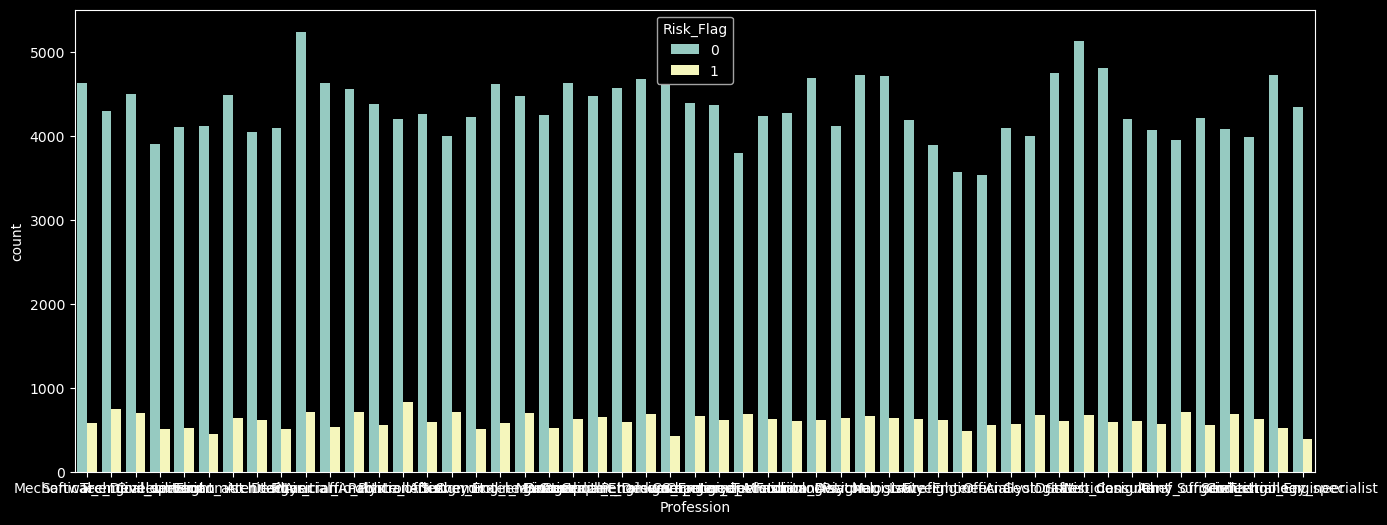

In [135]:
df2 = df
df2['Risk_Flag'] = df['Risk_Flag'].astype(str)
plt.figure(figsize=(16,6))
sns.countplot(data = df2, x = 'Profession', hue = 'Risk_Flag')
plt.show()

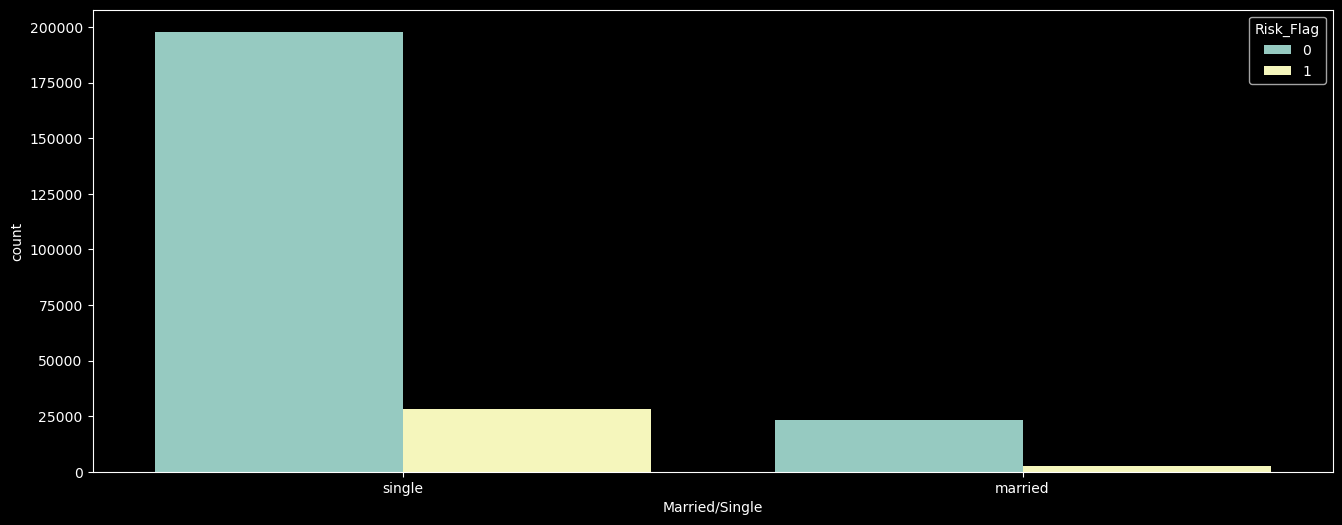

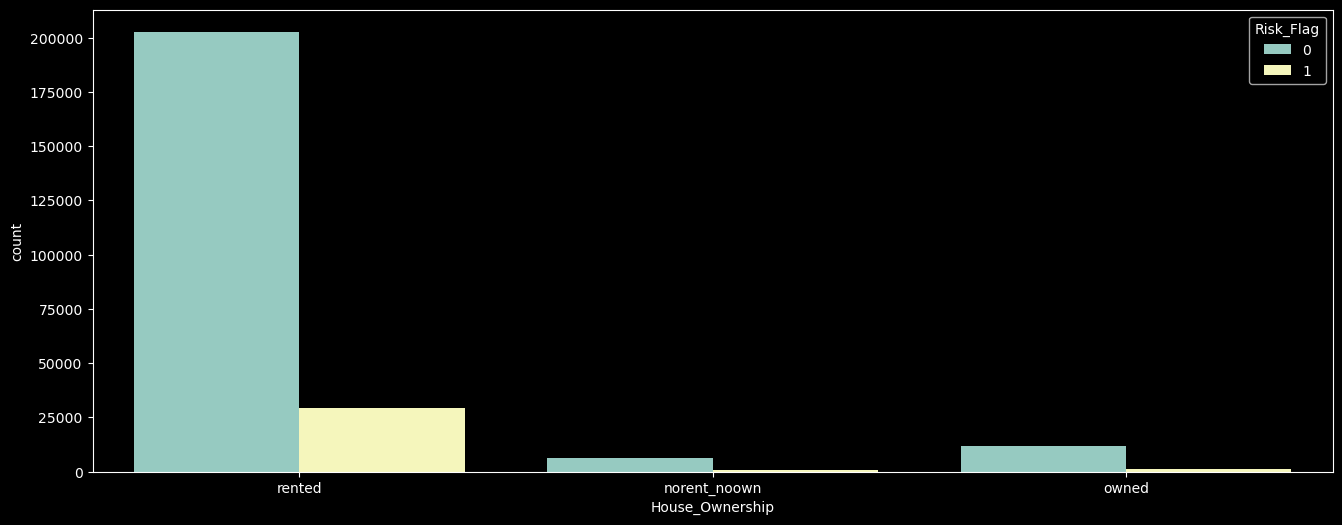

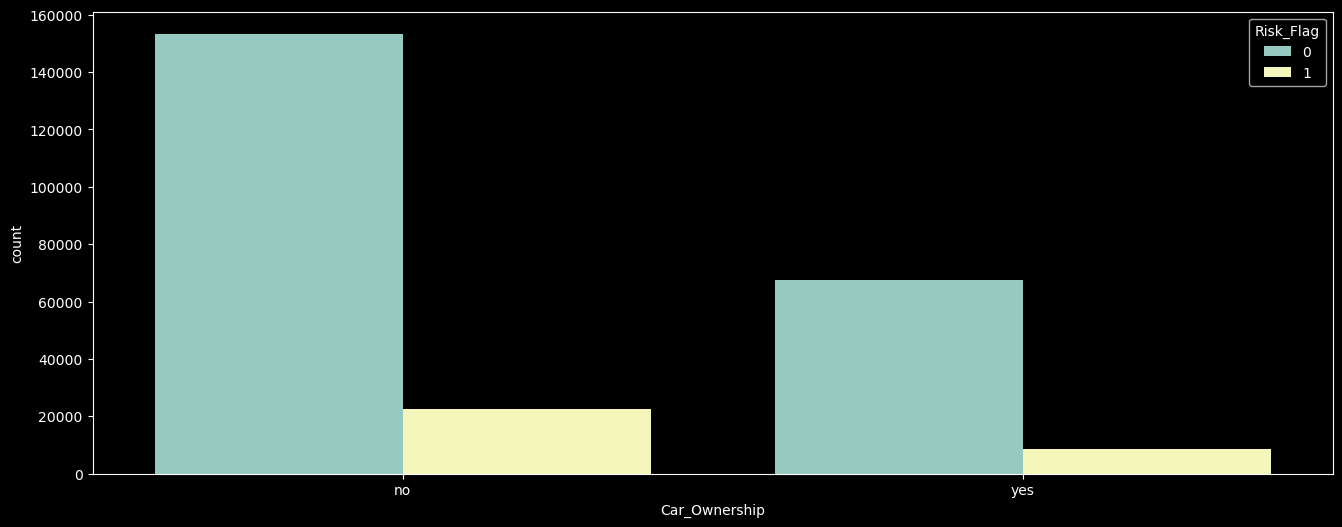

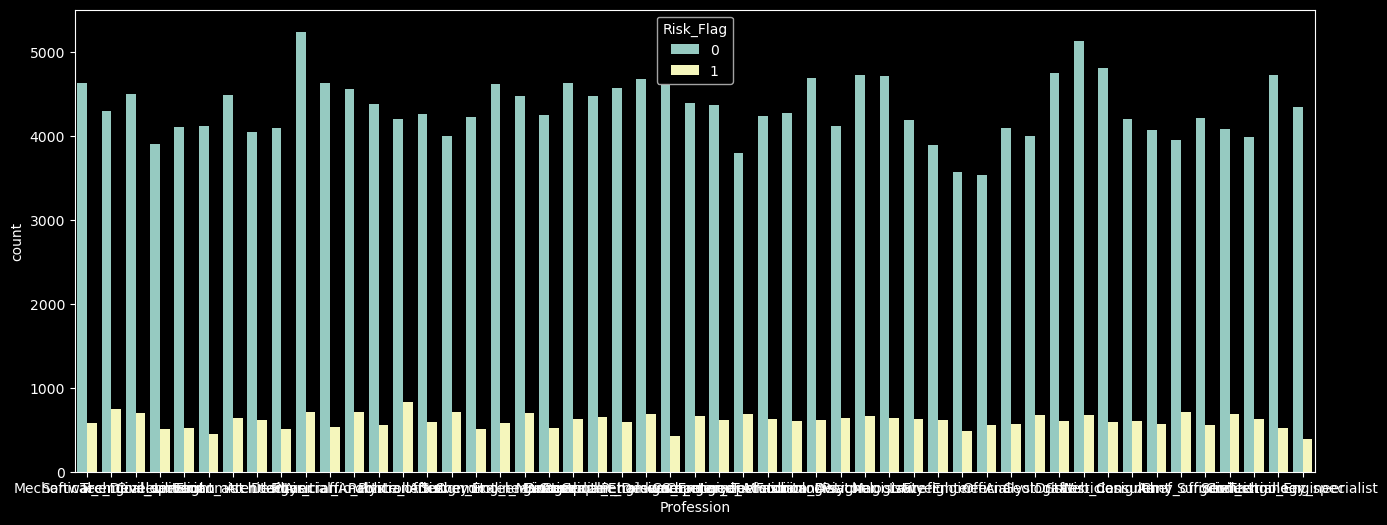

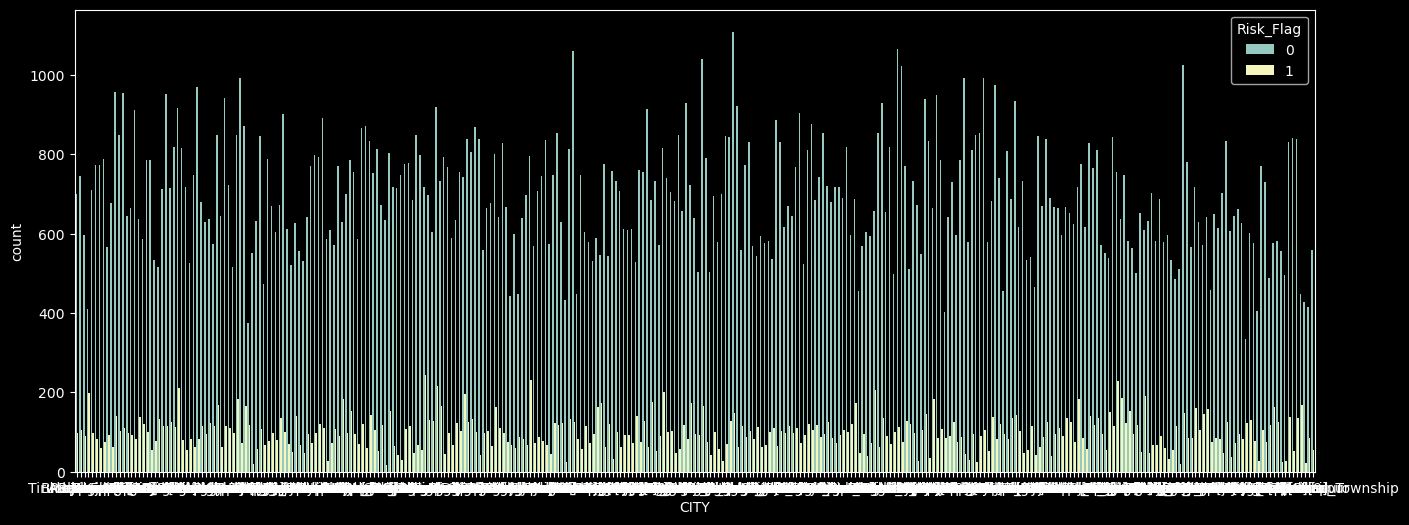

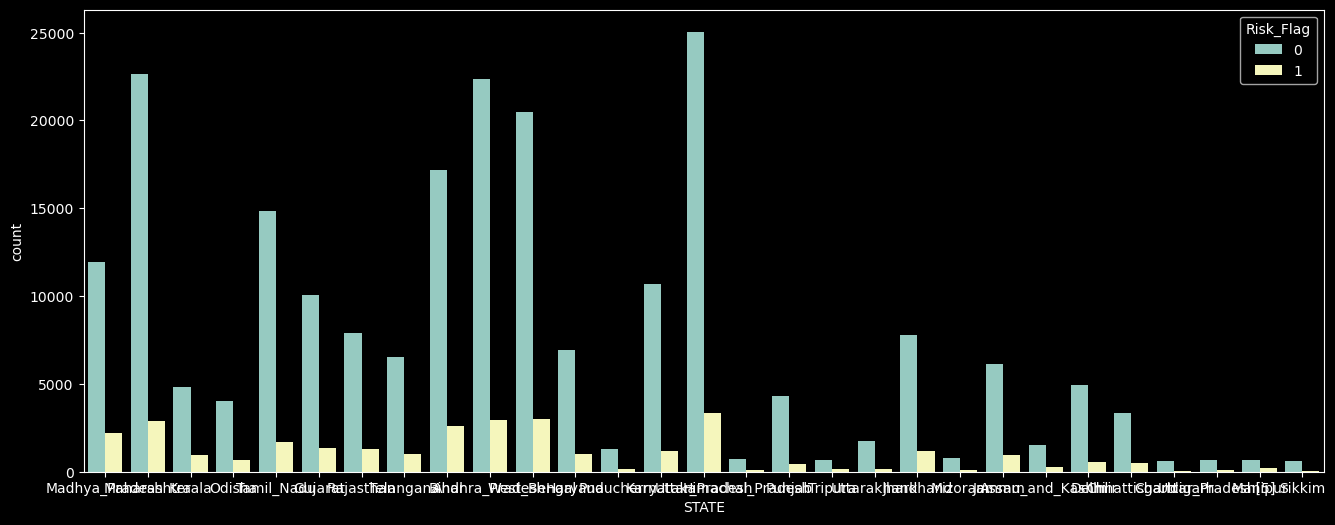

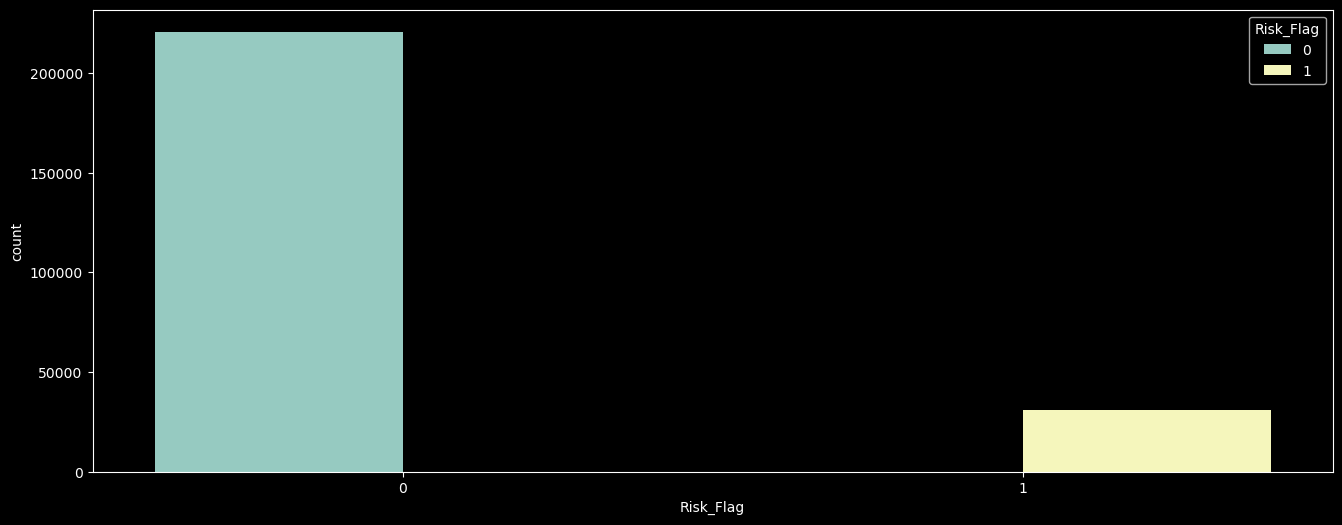

In [142]:
for i in df2.columns:
    if df2[i].dtypes == 'object':
        plt.figure(figsize=(16,6))
        sns.countplot(data = df2, x = df2[i], hue = 'Risk_Flag')
        plt.show()

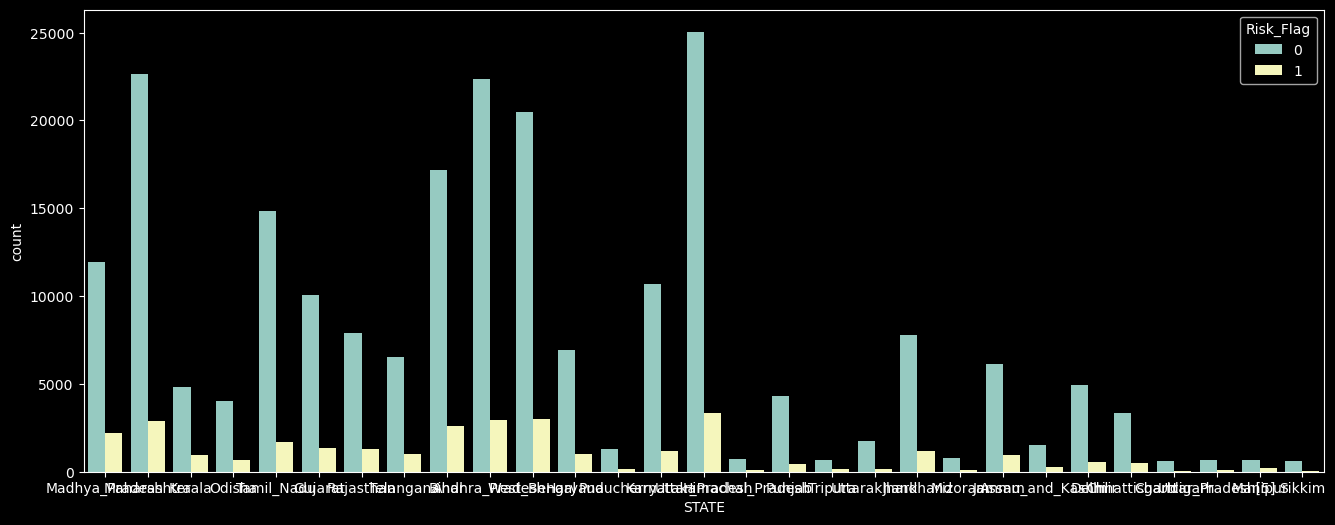

In [139]:
plt.figure(figsize=(16,6))
sns.countplot(data = df2, x = 'STATE', hue = 'Risk_Flag')
plt.show()

In [39]:
'''df1 = df.drop(['Id',''Profession','CITY'],axis=1)
df1'''

SyntaxError: unterminated string literal (detected at line 1) (613697526.py, line 1)

In [12]:
'''df1 = pd.get_dummies(df,columns=['House_Ownership'])
df1[['House_Ownership_norent_noown', 'House_Ownership_owned',
       'House_Ownership_rented']] = df1[['House_Ownership_norent_noown', 'House_Ownership_owned',
       'House_Ownership_rented']].astype('int64')
df1['Married/Single'].replace({'single': 0, 'married':1},inplace=True)
df1['Car_Ownership'].replace({'yes': 1, 'no': 0}, inplace=True)
df1'''

,Id,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1,1303834,23,3,0,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0,0,1
1,2,7574516,40,10,0,0,Software_Developer,Parbhani,Maharashtra,9,13,0,0,0,1
2,3,3991815,66,4,1,0,Technical_writer,Alappuzha,Kerala,4,10,0,0,0,1
3,4,6256451,41,2,0,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,0,0,1
4,5,5768871,47,11,0,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,0,0,Surgeon,Kolkata,West_Bengal,6,11,0,0,0,1
251996,251997,2843572,26,10,0,0,Army_officer,Rewa,Madhya_Pradesh,6,11,0,0,0,1
251997,251998,4522448,46,7,0,0,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,0,0,1
251998,251999,6507128,45,0,0,0,Graphic_Designer,Pondicherry,Puducherry,0,10,0,0,0,1
